# Calculating the Mean 
## But first, some numpy review:

In [1]:
# Can calculte stats such as mean, std dev, and len of a list using np
import numpy as np
 
# For ex:
fluxes = np.array([23.3, 42.1, 2.0, -3.2, 55.6])
mean = np.mean(fluxes)
print(mean)

print(np.size(fluxes)) # length of array
print(np.std(fluxes)) # standard deviation of elements in array

23.96
5
22.585358088814974


In [2]:
# Tables are often stored in comma separated values or CSVs
# The following shows how to read CSV files
# Want to store each row in a list and whole file as a list of these rows
# Each row has values
# There are several rows

# Empty list
data = []
for line in open('data.csv'):
    data.append(line.strip().split(','))
print(data)

# strip removes whitespice (including newline)
# split creates a list of strings using the inputted character as the separator

[['8.84', '17.22', '13.22', '3.84'], ['3.99', '11.73', '19.66', '1.27'], ['16.14', '18.72', '7.43', '11.09']]


In [4]:
# Now that data in a CSV can be stored in a list, we need to convert each item from a string to float
# This can be done using nested for loops:

data = []
for line in open('data.csv'): # For each row in data.csv
    row = [] # Empty list representing each row
    for col in line.strip().split(','): # For each column in a stripped and splitted row
        row.append(float(col)) # Append the float value of the string to row
    data.append(row) # Then append the row to data

print(data)

# Numpy has a simpler way of doing this:
import numpy as np

data = []
for line in open('data.csv'):
    data.append(line.strip().split(','))
    
data = np.asarray(data, float)
print(data)

# Most Numpy function operate on the whole array at once rather than individual items

[[8.84, 17.22, 13.22, 3.84], [3.99, 11.73, 19.66, 1.27], [16.14, 18.72, 7.43, 11.09]]


### The Numpy loadtxt function can automatically read a CSV file into a Numpy array, including the string to float conversion

In [6]:
import numpy as np
data = np.loadtxt('data.csv', delimiter=',') # delimiter: designate comma as separator
print(data)

# Simpler, faster, less error-prone

[[ 8.84 17.22 13.22  3.84]
 [ 3.99 11.73 19.66  1.27]
 [16.14 18.72  7.43 11.09]]


### Constructing a multi-dimensional array in Numpy

In [2]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]]) # 2 x 3 array

# Print first row of a:
print(a[0,:]) 

# Print second col of a:
print(a[:, 1])

[1 2 3]
[2 5]


## Mean set of signals

Using the three datasets data1, data2, data3, make a function that takes a list of the files and returns an array of the mean of the three datasets in each cell.  

In [1]:
import numpy as np

def mean_datasets(files):
    n = len(files)
    if n > 0:
        data = np.loadtxt(files[0], delimiter=',')
        for i in range(1, n):
            data += np.loadtxt(files[i], delimiter=',')
    mean = np.round(data/n, 1)
    
    return mean

mean_datasets(['data1.csv', 'data2.csv', 'data3.csv'])

array([[11. , 11.9, 13. ],
       [ 9.5,  6.8,  9.4],
       [ 7.2, 11.1, 12.5],
       [ 8.8,  7.3,  9.2],
       [16.6, 10.6, 10.3]])

# Working with FITS files

In [2]:
# Opening a FITS file and printing out its header info:
from astropy.io import fits
hdulist = fits.open('image0.fits')
hdulist.info()

Filename: image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [6]:
# Opening a FITS file in astropy returns a HDU (Header/Data Unit) list. Each HDU stored headers and (optionally)
# image data. The header contains metadata about the HDU object, e.g. dimensions and data type.
# The first HDU is called primary HDU.

# To acess individual HDUs, we can index the HDU list object returned by fits.open

from astropy.io import fits
hdulist = fits.open('image0.fits')
data = hdulist[0].data
print(data.shape)

(200, 200)


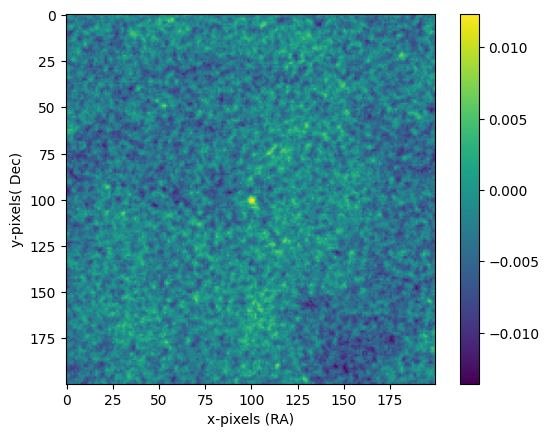

In [8]:
# Often, we want to visualize the data stored in FITS Files
# We can do this using matplotlib

from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open('image0.fits')
data = hdulist[0].data

# Plot the 2D array
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels( Dec)')
plt.colorbar()
plt.show()

(101, 100)


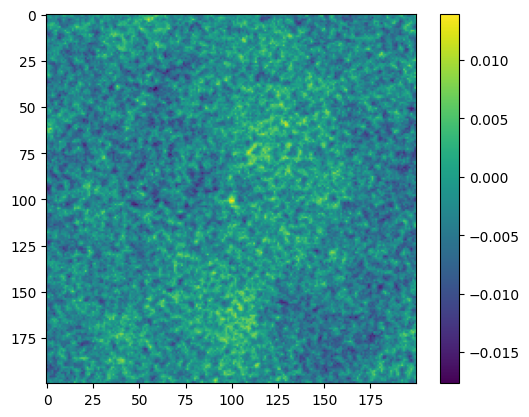

In [12]:
# Write a load fits function that loads in a FITS file 
# and finds the position of the brightest pixel (i.e. maximum value) in its image data

# To make this function work for an arbitrary number of files, pass the name of the FITS file as an argument to the function

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

def load_fits(image):
    hdulist = fits.open(image)
    data = hdulist[0].data
    
    arg_max = np.argmax(data)
    max_pos = np.unravel_index(arg_max, data.shape)
    
    return max_pos

bright = load_fits('image1.fits')
print(bright)
    
hdulist = fits.open('image1.fits')
data = hdulist[0].data
    
plt.imshow(data, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()


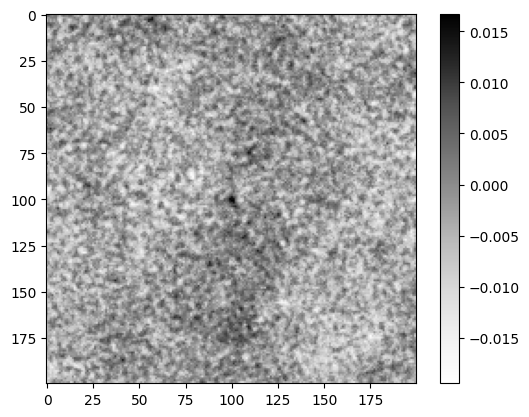

In [36]:
# Write a function that calulates the mean stack of a list of given image files

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

def mean_fits(files):
    n = len(files)
    if n > 0:
        
        hdulist = fits.open(files[0])
        data = hdulist[0].data
        hdulist.close()
        
        for i in range(1, n):
            hdulist = fits.open(files[i])
            data += hdulist[0].data
            hdulist.close()
        
    mean = data/n
    return mean

mean_stack =  mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits'])

plt.figure()
plt.imshow(mean_stack, cmap=plt.cm.Grays)
plt.colorbar()
plt.show()